In [1]:
from plotnine import aes, annotate, facet_wrap, ggplot, geom_point
from plotnine.data import mtcars
from plotnine.helpers import get_aesthetic_limits

Here we create a plot, get the _current_ limits and add annotations using the values of the limits.

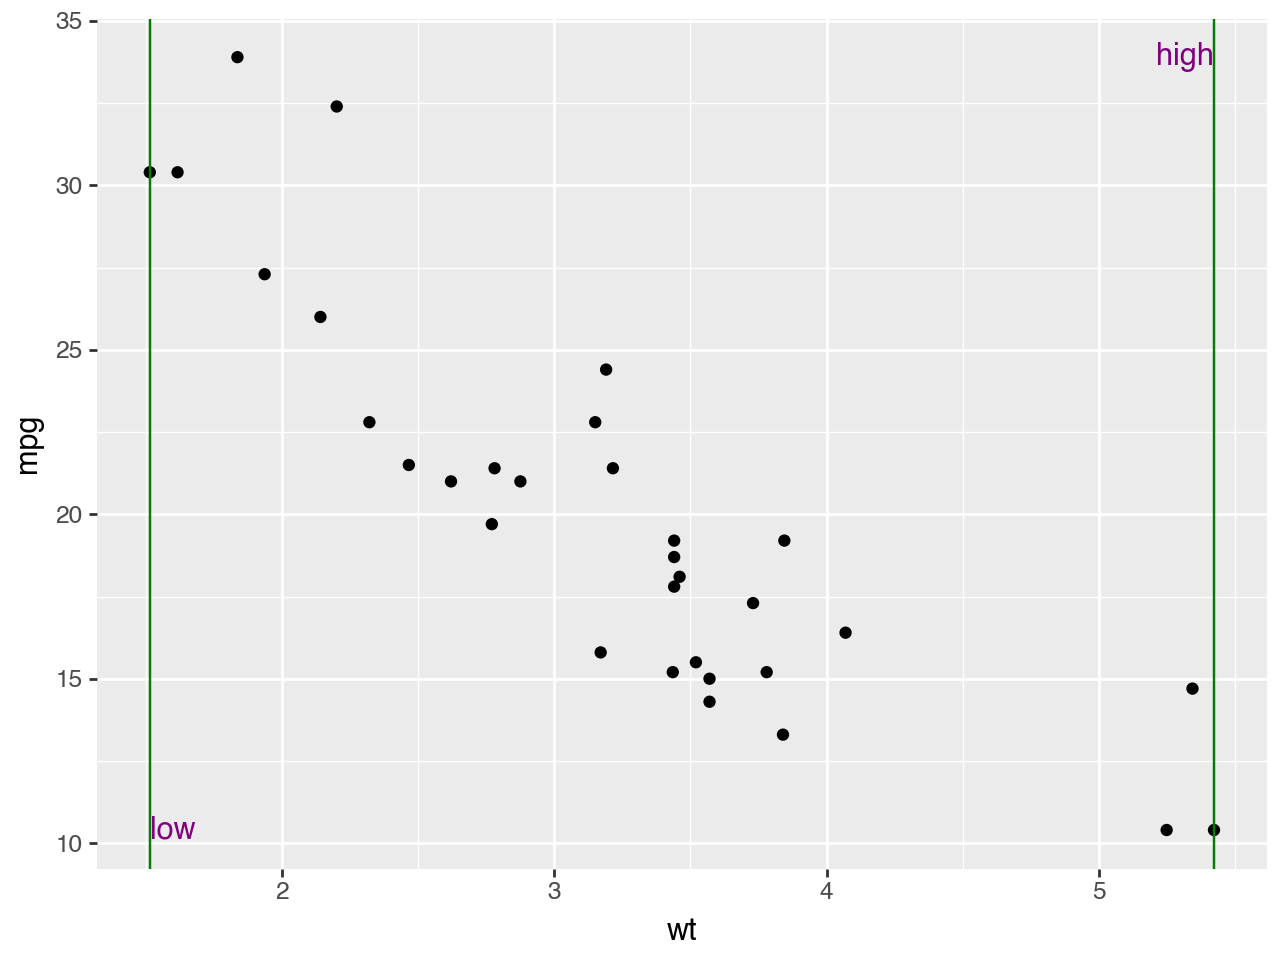

In [2]:
p = (
    ggplot(mtcars, aes("wt", "mpg"))
    + geom_point()
)

x_limits = get_aesthetic_limits(p, "x")
y_limits = get_aesthetic_limits(p, "y")

(
    p
    + annotate("vline", xintercept=x_limits, color="green")
    + annotate("text", x=x_limits, y=y_limits, label=["low", "high"], ha=["left", "right"], color="purple")
)

We got the limits before facetting

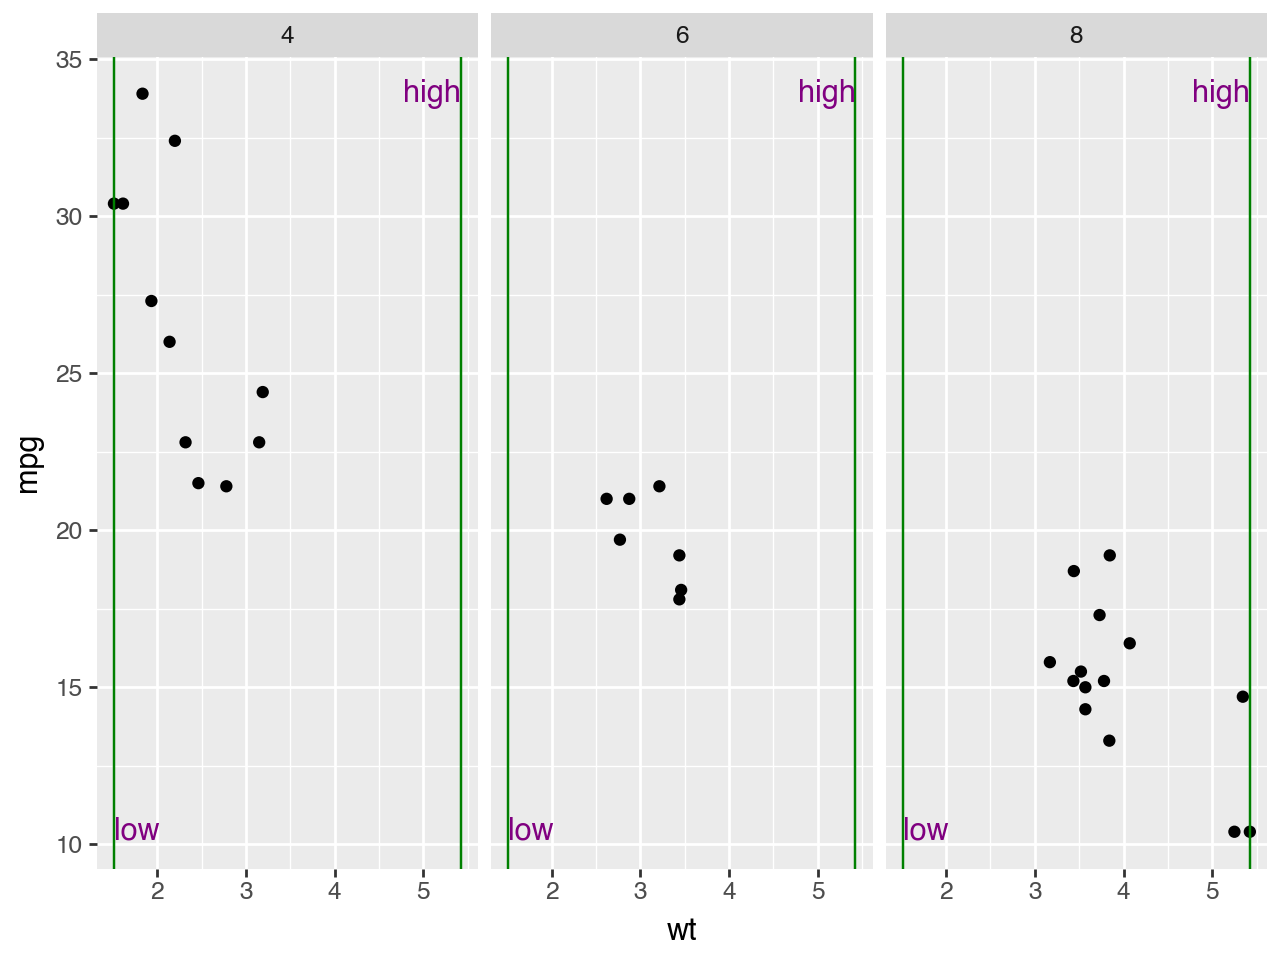

In [3]:
(
    p
    + annotate("vline", xintercept=x_limits, color="green")
    + annotate("text", x=x_limits, y=y_limits, label=["low", "high"], ha=["left", "right"], color="purple")
    + facet_wrap("cyl")
)

When we call the function facetting, we get list of limits with _each panel_.

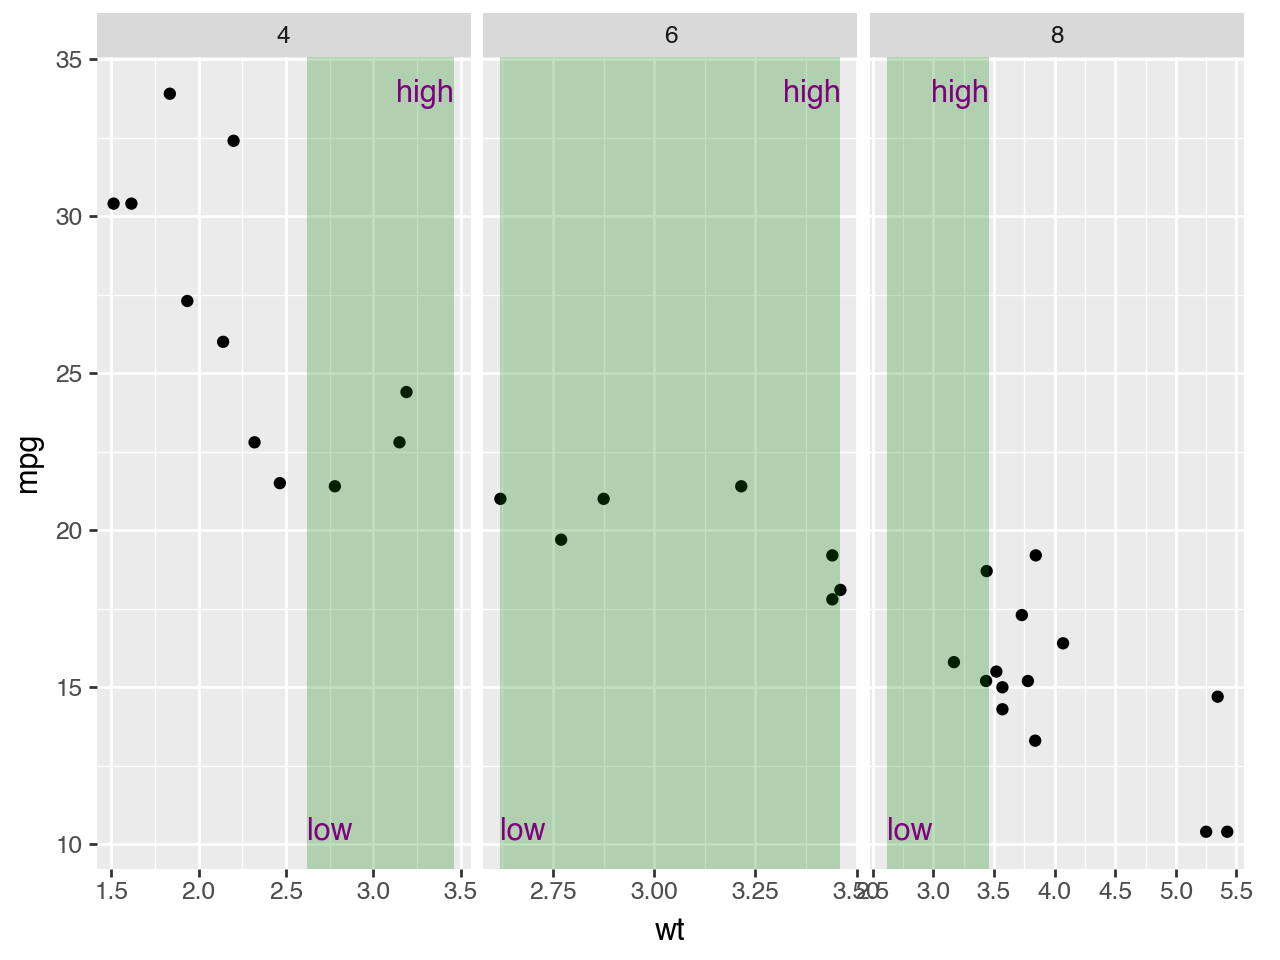

In [4]:
p = (
    ggplot(mtcars, aes("wt", "mpg"))
    + geom_point()
    + facet_wrap("cyl", scales="free_x")
)

x_limits_lst = get_aesthetic_limits(p, "x")  # limits for 1st, 2nd & 3rd panel
x_limits = x_limits_lst[1]  # limits of the 2nd panel

(
    p
    + annotate(
        "rect",
        xmin=x_limits[0],
        xmax=x_limits[1],
        ymin=-float("inf"),
        ymax=float("inf"),
        fill="green",
        alpha=.25
    )
    + annotate("text", x=x_limits, y=y_limits, label=["low", "high"], ha=["left", "right"], color="purple")
)